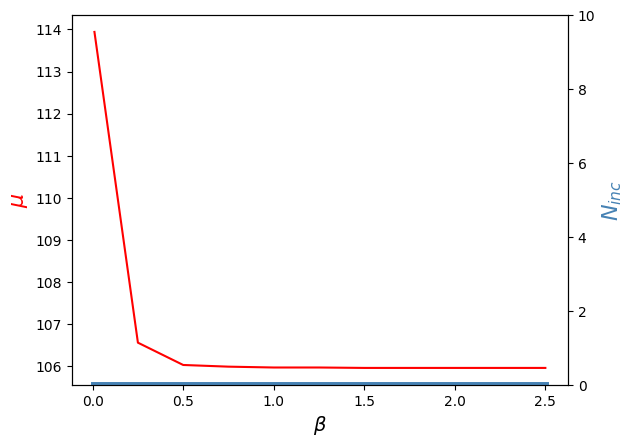

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('results/Admission.csv', sep=';')

df = df.head(10)
#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df.beta, df.mu, color='red')

#add x-axis label
ax.set_xlabel(r'$\beta$', fontsize=14)

#add y-axis label
ax.set_ylabel(r'$\mu$', color='red', fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df.beta, df.Ninc, color='steelblue', linewidth=5)
ax2.set_ylim(bottom=0, top=10)

#add second y-axis label
ax2.set_ylabel(r'$N_{inc}$', color='steelblue', fontsize=16)

fig.savefig('../ongoing_research/admission_beta.png', bbox_inches='tight', dpi=150)

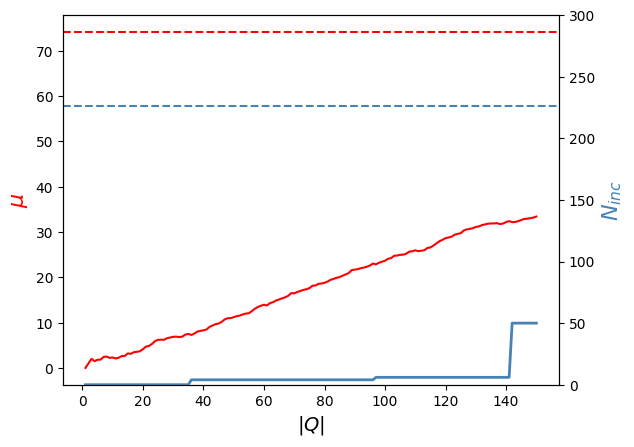

In [ ]:
df = pd.read_csv("results/Q_admission.csv", sep=";")

# define subplots
fig, ax = plt.subplots()

# add first line to plot
ax.plot(df["|Q|"], df.mu, color="red")
ax.axhline(y=74.18, color="red", linestyle="--")

# add x-axis label
ax.set_xlabel(r"$|Q|$", fontsize=14)

# add y-axis label
ax.set_ylabel(r"$\mu$", color="red", fontsize=16)

# define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

# add second line to plot
ax2.plot(df["|Q|"], df.Ninc, color="steelblue", linewidth=2)
ax2.axhline(y=226, color="steelblue", linestyle="--")
ax2.set_ylim(bottom=0, top=300)

# add second y-axis label
ax2.set_ylabel(r"$N_{inc}$", color="steelblue", fontsize=16)

fig.savefig("../ongoing_research/admission_Q.png", bbox_inches="tight", dpi=150)

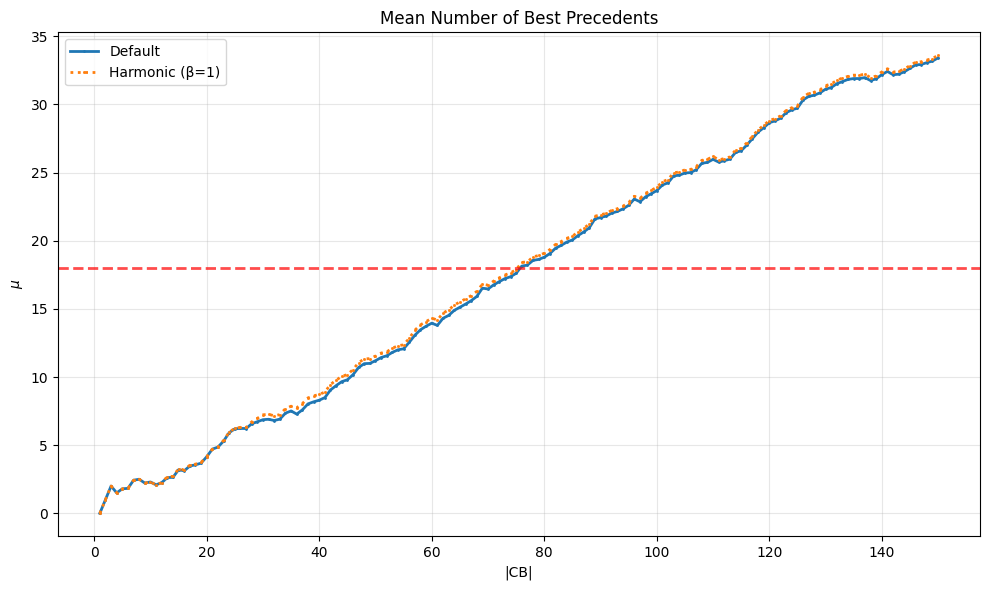

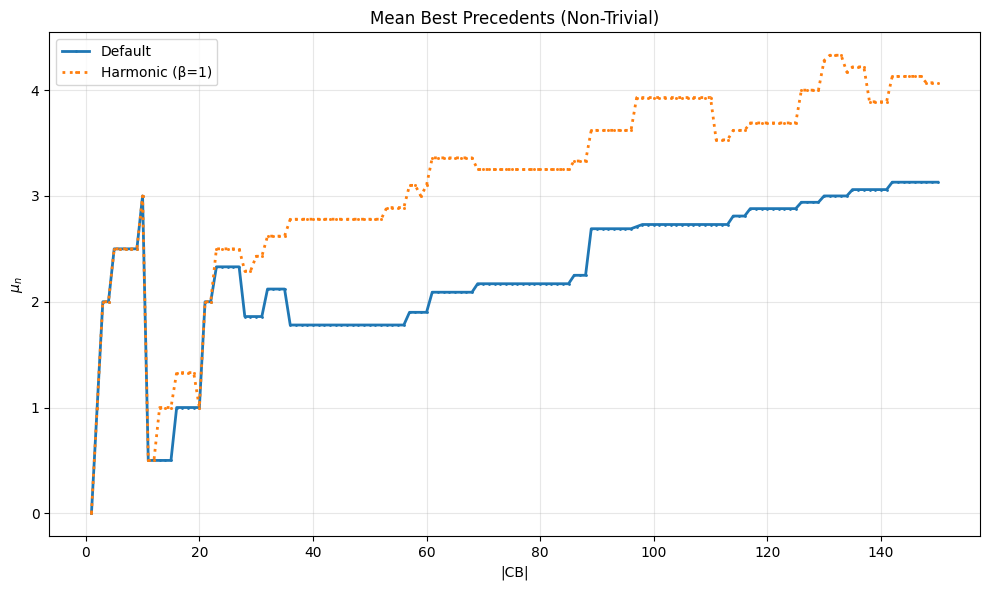

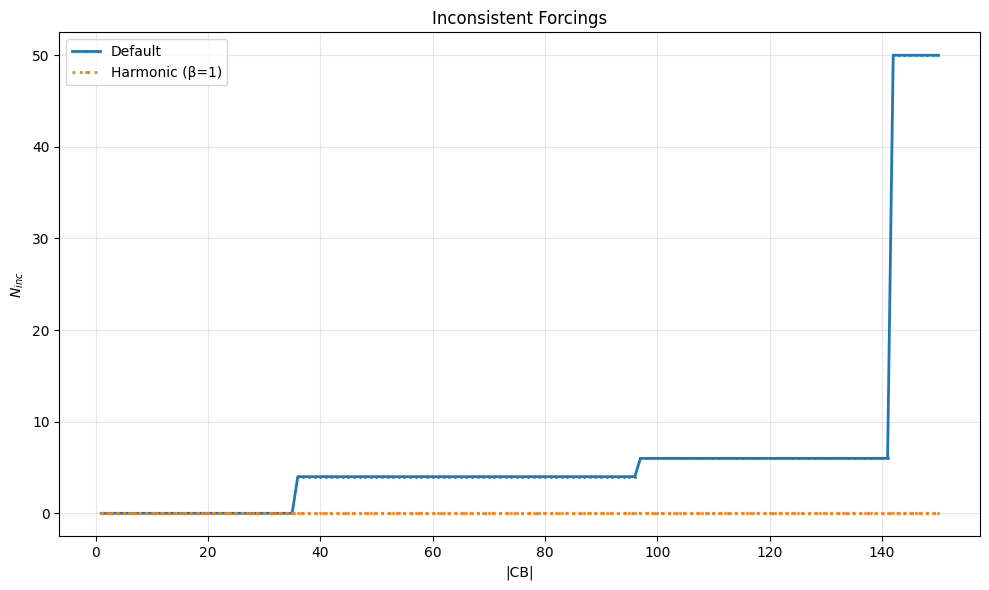

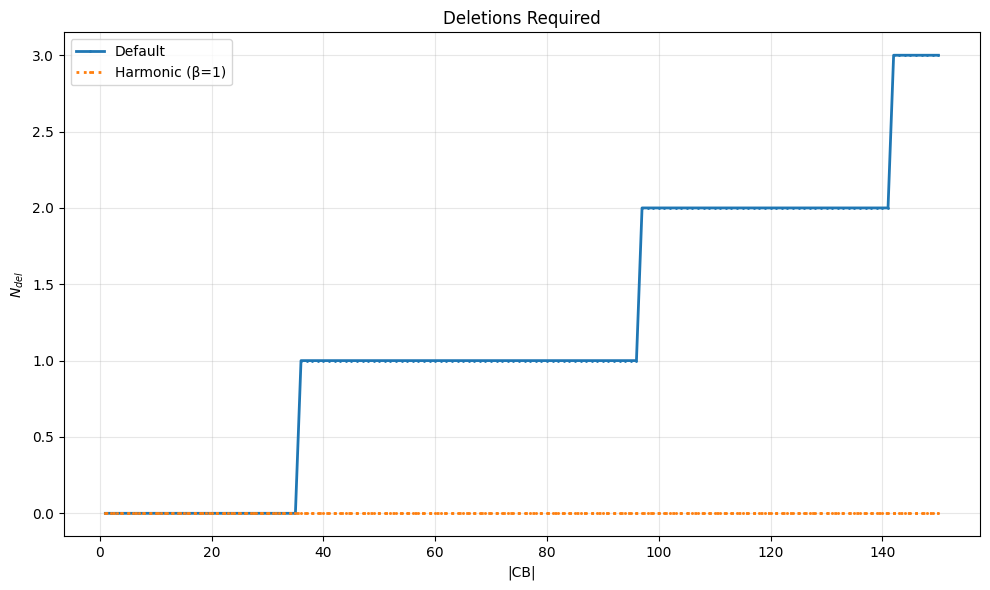

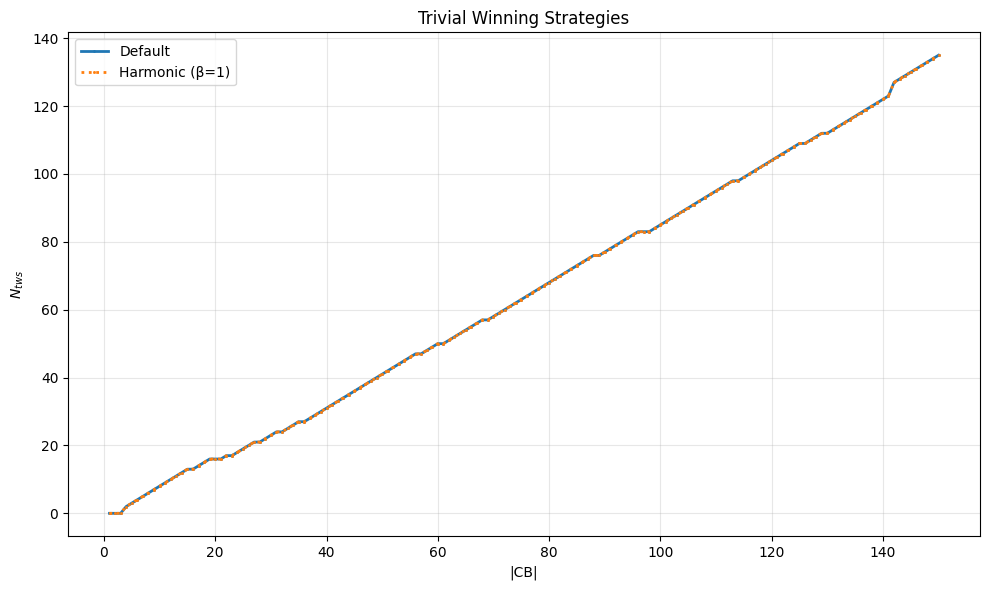

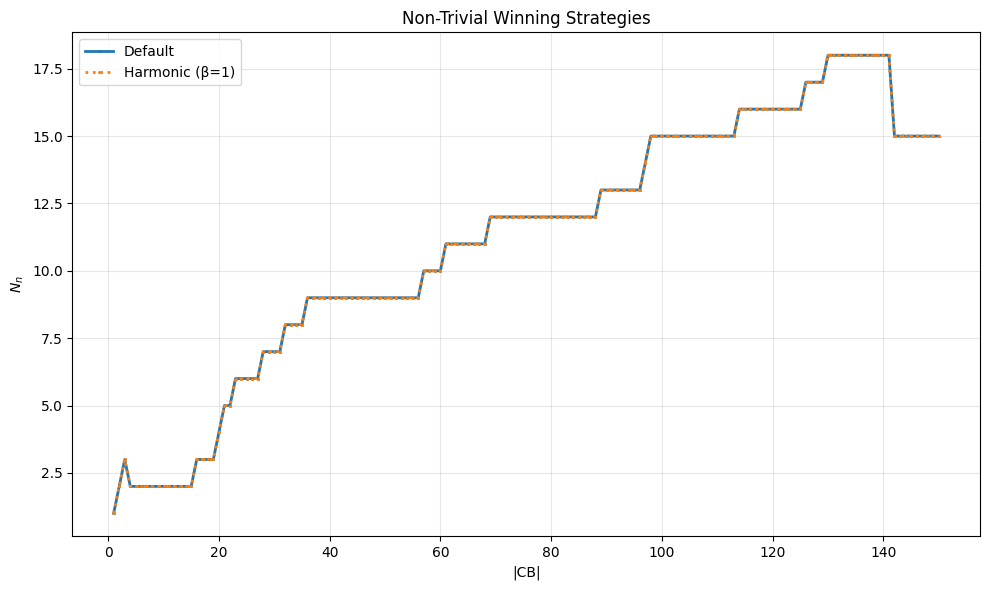

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_default = pd.read_csv("results/Q_admission_default.csv", sep=";", index_col="|Q|")
df_harmonic = pd.read_csv("results/Q_admission_harmonic.csv", sep=";", index_col="|Q|")


def plot_metric(df_default, df_harmonic, metric, ylabel, title, constant_line=None):
    plt.figure(figsize=(10, 6))
    plt.plot(
        df_default.index,
        df_default[metric],
        marker="o",
        label="Default",
        linewidth=2,
        markersize=1,
        linestyle="-",
    )
    plt.plot(
        df_harmonic.index,
        df_harmonic[metric],
        marker="s",
        label="Harmonic (β=1)",
        linewidth=2,
        markersize=1,
        linestyle=":",
    )

    # Add horizontal dashed line if specified
    if constant_line is not None:
        plt.axhline(
            y=constant_line, color="red", linestyle="--", linewidth=2, alpha=0.7
        )

    plt.xlabel("|CB|")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_metric(
    df_default,
    df_harmonic,
    "mu",
    "$\mu$",
    "Mean Number of Best Precedents",
    constant_line=18,
)
plot_metric(
    df_default, df_harmonic, "mu_n", "$\mu_n$", "Mean Best Precedents (Non-Trivial)"
)
plot_metric(df_default, df_harmonic, "Ninc", "$N_{inc}$", "Inconsistent Forcings")
plot_metric(df_default, df_harmonic, "Ndel", "$N_{del}$", "Deletions Required")
plot_metric(df_default, df_harmonic, "Ntws", "$N_{tws}$", "Trivial Winning Strategies")
plot_metric(df_default, df_harmonic, "Nn", "$N_n$", "Non-Trivial Winning Strategies")